In [23]:
import os 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [25]:
data = pd.read_csv("C:/Users/KimSeongHoon/OneDrive/바탕 화면/competition_data/train.csv")

# 무의미한 변수 제거
#data = data.fillna(data.mean())
data = data.drop(['index', 'country'],axis = 1)

In [26]:
#data_new =  pd.read_csv("C:/Users/KimSeongHoon/OneDrive/바탕 화면/competition_data/train_new.csv")
#data = pd.concat([data,data_new])
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [27]:
# shape확인
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 15000 nVar: 68


In [6]:
y_data = data["nerdiness"]
x_data = data.drop("nerdiness", axis=1)
x_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q1            14959 non-null  float64
 1   Q2            14931 non-null  float64
 2   Q3            14950 non-null  float64
 3   Q4            14929 non-null  float64
 4   Q5            14962 non-null  float64
 5   Q6            14952 non-null  float64
 6   Q7            14924 non-null  float64
 7   Q8            14952 non-null  float64
 8   Q9            14944 non-null  float64
 9   Q10           14928 non-null  float64
 10  Q11           14941 non-null  float64
 11  Q12           14933 non-null  float64
 12  Q13           14960 non-null  float64
 13  Q14           14964 non-null  float64
 14  Q15           14955 non-null  float64
 15  Q16           14967 non-null  float64
 16  Q17           14963 non-null  float64
 17  Q18           14937 non-null  float64
 18  Q19           14947 non-nu

In [21]:
data.groupby(['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26'])['nerdiness'].mean()*100

Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9   Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26
1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                                          3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                                     3.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                           3.0  3.0  1.0  2.0  3.0  1.0  1.0  1.0  1.0  1.0  2.0      0.000000
                              3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  5.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                        5.0  1.0  1.0  1.0  5.0  1.0  5.0  1.0  1.0  1.0  5.0  5.0  1.0  1.0  1.0  5.0  5.0  5.0      0.000000
             

<AxesSubplot:xlabel='age'>

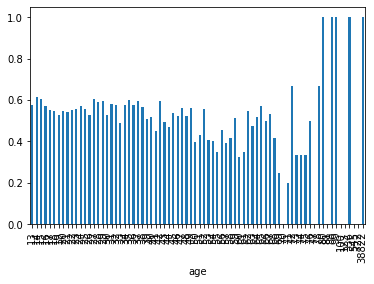

In [76]:
data.groupby(['age',])['nerdiness'].mean().plot(kind = 'bar')

In [41]:
data.groupby(['religion',])['nerdiness'].mean()*100

religion
1.0     56.589359
2.0     59.792388
3.0     49.537037
4.0     48.805257
5.0     62.179487
6.0     54.897494
7.0     52.253756
8.0     42.276423
9.0     64.928910
10.0    42.443064
11.0    28.571429
12.0    56.772101
Name: nerdiness, dtype: float64

<AxesSubplot:xlabel='religion'>

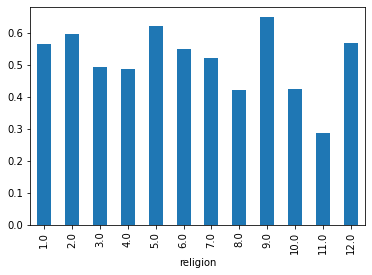

In [52]:
data.groupby(['religion',])['nerdiness'].mean().plot(kind = 'bar')

In [28]:
data.groupby(['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26'])['nerdiness'].mean()*100

Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9   Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26
1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                                          3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                                     3.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                                                           3.0  3.0  1.0  2.0  3.0  1.0  1.0  1.0  1.0  1.0  2.0      0.000000
                              3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  5.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0      0.000000
                                        5.0  1.0  1.0  1.0  5.0  1.0  5.0  1.0  1.0  1.0  5.0  5.0  1.0  1.0  1.0  5.0  5.0  5.0      0.000000
             

In [98]:
data.groupby(['VCL11','VCL2','VCL3','VCL4','VCL5'])['nerdiness'].mean()*100

VCL11  VCL2  VCL3  VCL4  VCL5
0      0     0     0     0       38.505747
                         1       35.135135
                   1     0       37.552743
                         1       45.009416
             1     0     0       71.428571
                         1       25.000000
                   1     0       50.000000
                         1       45.833333
       1     0     0     0       57.142857
                         1       43.589744
                   1     0       51.562500
                         1       50.405022
             1     0     0       40.000000
                         1       44.000000
                   1     0       55.000000
                         1       60.394916
1      0     0     0     0       59.090909
                         1       50.000000
                   1     0       25.000000
                         1       62.500000
             1     0     0       47.619048
                   1     0       50.000000
                        

<AxesSubplot:xlabel='Q22'>

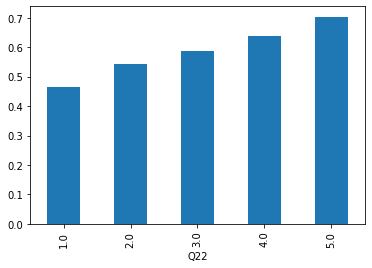

In [89]:
data.groupby(['Q22'])['nerdiness'].mean().plot(kind = 'bar')